In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
np.random.seed(42)

sns.set_style('whitegrid')
%matplotlib inline


In [3]:
customer = pd.read_csv('customer_segmentation.csv') 

In [4]:
print(customer.head())
print(customer.dtypes)
print(customer.shape)
print(customer.isna().sum())

   customer_id  age gender  dependent_count education_level marital_status  \
0    768805383   45      M                3     High School        Married   
1    818770008   49      F                5        Graduate         Single   
2    713982108   51      M                3        Graduate        Married   
3    769911858   40      F                4     High School        Unknown   
4    709106358   40      M                3      Uneducated        Married   

   estimated_income  months_on_book  total_relationship_count  \
0             69000              39                         5   
1             24000              44                         6   
2             93000              36                         4   
3             37000              34                         3   
4             65000              21                         5   

   months_inactive_12_mon  credit_limit  total_trans_amount  \
0                       1       12691.0                1144   
1             

 - The Dataset has got 10127 Rows and 14 columns
 - Categorical Variables
     - Gender
     - Education Level
     - Marital Status
     - 
 - There are no missing values.
 
 Of the 13 columns left, there are 8 columns containing integers, 
2 containing floats, and 3 columns containing strings,
 which means we have 3 categorical columns to deal with.




In [5]:
for col in ['gender', 'education_level', 'marital_status']:
    print(col)
    print(customer[col].value_counts(), end='\n\n')

gender
F    5358
M    4769
Name: gender, dtype: int64

education_level
Graduate         3685
High School      2351
Uneducated       1755
College          1192
Post-Graduate     616
Doctorate         528
Name: education_level, dtype: int64

marital_status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: marital_status, dtype: int64



Here we can see how many unique categories are there in each categorical variable and how many datapoints per category.

As we're working with unsupervised machine learning, there isn't a target variable on which we can measure the impacts of the other variables.

But we can see the correlation between the numeric variables and their distributions.

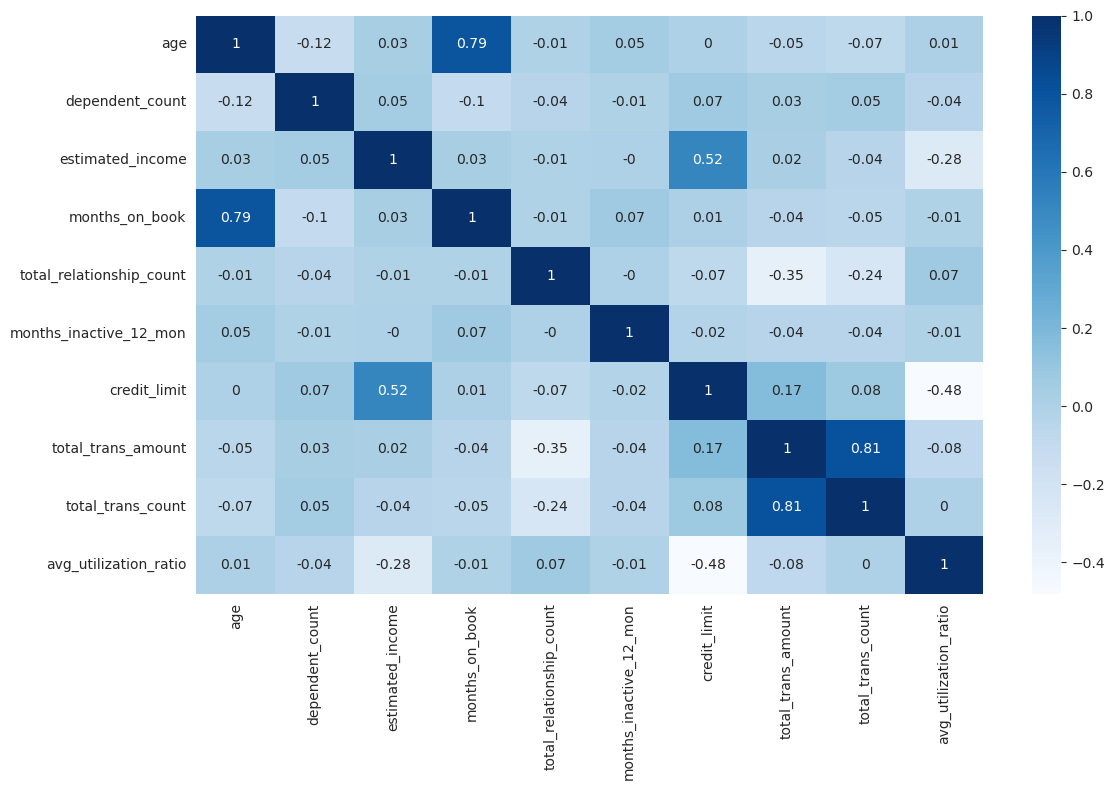

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(round(customer.drop('customer_id', axis=1).corr(), 2), cmap='Blues', annot=True, ax=ax)

plt.tight_layout()
plt.show()


/tmp/ipykernel_65/2544037232.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  customer.drop('customer_id', axis=1).hist(ax=ax)


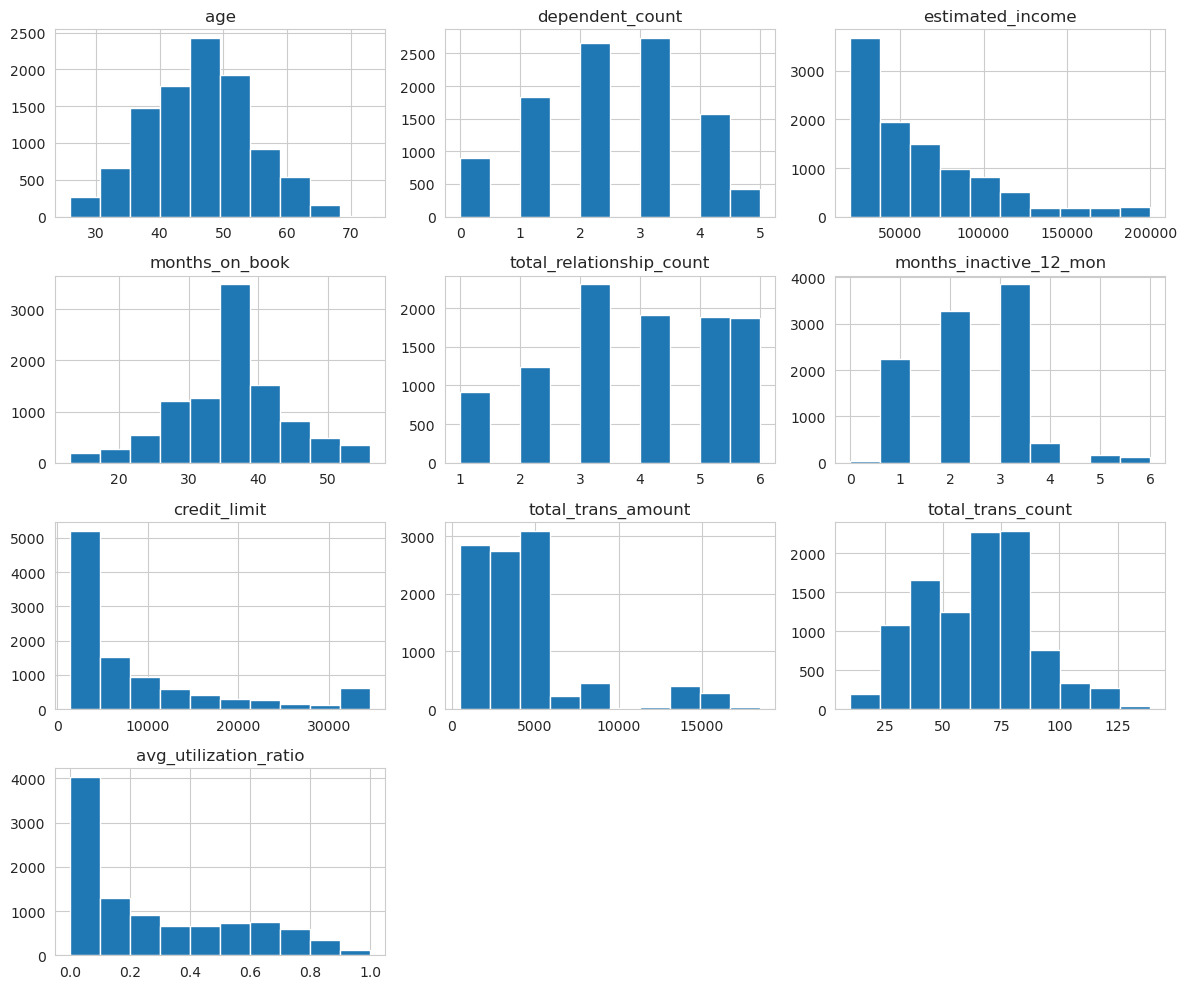

In [7]:
fig, ax = plt.subplots(figsize=(12, 10))

#Removing the customer's id before plotting the distributions
customer.drop('customer_id', axis=1).hist(ax=ax)

plt.tight_layout()
plt.show()

Most of the variables present weak correlations between each other, but there are some we can highlight:

- Age is strongly correlated with how long the person has been a customer (months_on_book);
- Credit limit is positively correlated with the estimated income and negatively correlated with the average utilization ratio;
- The total number of transactions (total_trans_count) is strongly correlated with the total amount transitioned (total_trans_amount).

# Feature Engineering
Replace Male with value 1 and Female with Value 0

Replace the values in the education_level column in the order below. Choose how to execute this replacement.
- Uneducated - 0
- High School - 1
- College - 2
- Graduate - 3
- Post-Graduate - 4
- Doctorate - 5


In [8]:
customers_modif = customer.copy()
customers_modif['gender'] = np.where(customers_modif['gender'] == 'M',1,2)


In [9]:
edu_dict = {'Uneducated': 0, 'High School': 1, 'College':2,'Graduate': 3, 'Post-Graduate': 4, 'Doctorate':5}
customers_modif.replace(to_replace=edu_dict,inplace=True)
for col in ['gender', 'education_level', 'marital_status']:
    print(col)
    print(customers_modif[col].value_counts(), end='\n\n')


gender
2    5358
1    4769
Name: gender, dtype: int64

education_level
3    3685
1    2351
0    1755
2    1192
4     616
5     528
Name: education_level, dtype: int64

marital_status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: marital_status, dtype: int64



# Feature Engineering - Part 2

Convert marital status using dummies since there is level of magnitude between status


In [10]:
dummies = pd.get_dummies(customers_modif[['marital_status']],drop_first=True)
print(dummies.head(5))

customers_modif = pd.concat([customers_modif,dummies],axis=1)
customers_modif.drop('marital_status',axis=1,inplace=True)

print(customers_modif.head(5))

   marital_status_Married  marital_status_Single  marital_status_Unknown
0                       1                      0                       0
1                       0                      1                       0
2                       1                      0                       0
3                       0                      0                       1
4                       1                      0                       0
   customer_id  age  gender  dependent_count  education_level  \
0    768805383   45       1                3                1   
1    818770008   49       2                5                3   
2    713982108   51       1                3                3   
3    769911858   40       2                4                1   
4    709106358   40       1                3                0   

   estimated_income  months_on_book  total_relationship_count  \
0             69000              39                         5   
1             24000              44      

# Scaling the Data

Note that we have different scaled data across the DataFrame. The estimated_income, for instance, contains numbers in the range of dozens and hundreds of thousands, while the dependent_count column contains numbers from 1 to 5.

At this point of the project we need to transform the data so it's all on the same scale.

In [11]:
customer_new = customers_modif.drop('customer_id',axis=1).copy()

scaler = StandardScaler()
scaler.fit(customer_new)
customer_scaled = scaler.transform(customer_new)
print(customer_scaled[:5])

[[-0.16540558 -1.05995565  0.50336813 -0.75221102  0.1758098   0.38462088
   0.76394261 -1.32713603  0.4466219  -0.95970657 -0.97389518 -0.77588223
   1.07733799 -0.79850685 -0.28260887]
 [ 0.33357038  0.9434357   2.04319867  0.66278684 -0.96716585  1.01071482
   1.40730617 -1.32713603 -0.04136665 -0.91643261 -1.35734038 -0.61627565
  -0.92821381  1.2523374  -0.28260887]
 [ 0.58305837 -1.05995565  0.50336813  0.66278684  0.78539682  0.00896451
   0.12057905 -1.32713603 -0.5736978  -0.74098169 -1.91120566 -0.99715499
   1.07733799 -0.79850685 -0.28260887]
 [-0.78912553  0.9434357   1.2732834  -0.75221102 -0.63697289 -0.24147306
  -0.52278451  1.64147829 -0.58525108 -0.95175829 -1.91120566  1.75968594
  -0.92821381 -0.79850685  3.53845931]
 [-0.78912553 -1.05995565  0.50336813 -1.45970995  0.07421197 -1.86931731
   0.76394261 -1.32713603 -0.43087725 -1.05626345 -1.57036549 -0.99715499
   1.07733799 -0.79850685 -0.28260887]]


# Choosing K

Now our dataset is ready for machine learning. The next step is to decide the best number of clusters to use in the segmentation according to the inertia metric.

We'll have to create several models and compute the inertia from each of them. Then, we'll be able to plot the Elbow Curve and decide the number of clusters we'll use to segment the customers. Once we do all that, we can perform the real clusterization.

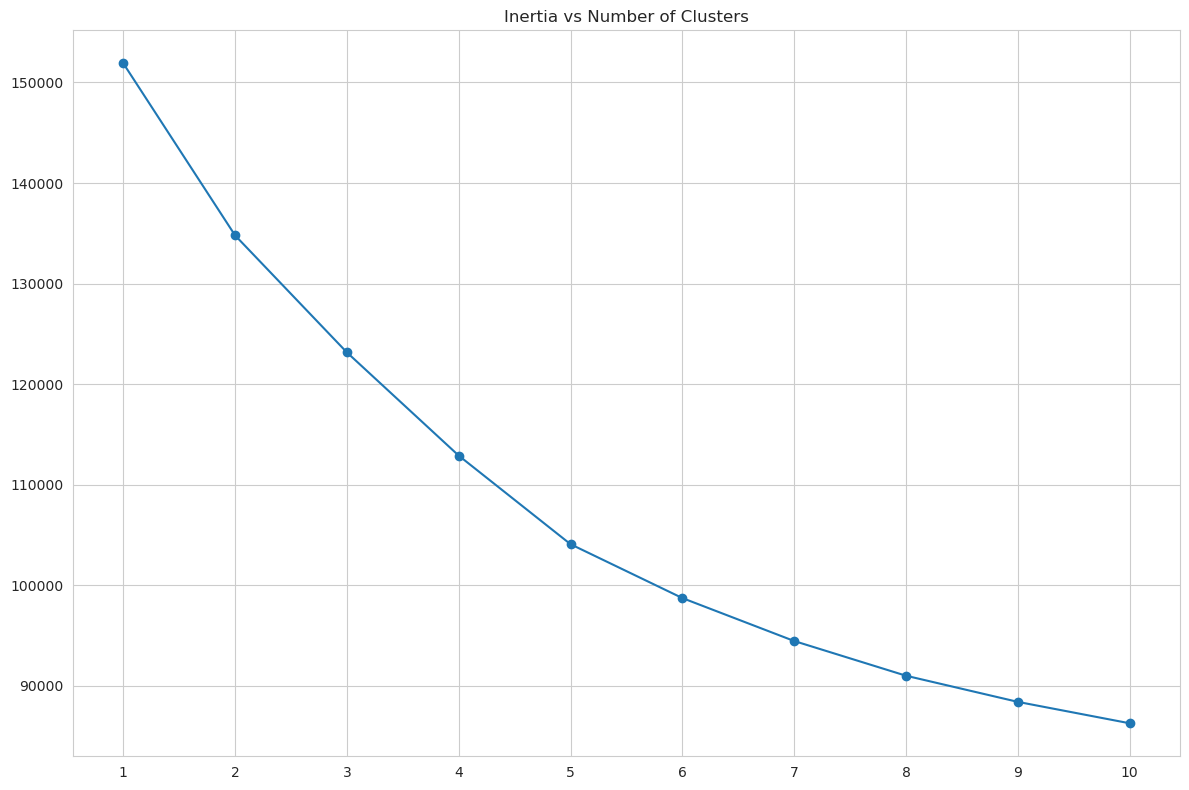

In [13]:
X = pd.DataFrame(customer_scaled)
inertias = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    clusters = model.fit_predict(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), inertias, marker='o')
plt.xticks(ticks=range(1, 11), labels=range(1, 11))
plt.title('Inertia vs Number of Clusters')

plt.tight_layout()
plt.show()


In [14]:
model = KMeans(n_clusters=6)
clusters = model.fit_predict(X)

print(clusters)

[0 3 0 ... 1 2 1]


It looks like the rate of decreasing of the inertia 
slows down between 5 and 7 clusters. We'll use 6 clusters to move on.


In [15]:
customer['CLUSTER'] = clusters+1
print(customer.head())
print(customer['CLUSTER'].value_counts())


   customer_id  age gender  dependent_count education_level marital_status  \
0    768805383   45      M                3     High School        Married   
1    818770008   49      F                5        Graduate         Single   
2    713982108   51      M                3        Graduate        Married   
3    769911858   40      F                4     High School        Unknown   
4    709106358   40      M                3      Uneducated        Married   

   estimated_income  months_on_book  total_relationship_count  \
0             69000              39                         5   
1             24000              44                         6   
2             93000              36                         4   
3             37000              34                         3   
4             65000              21                         5   

   months_inactive_12_mon  credit_limit  total_trans_amount  \
0                       1       12691.0                1144   
1             

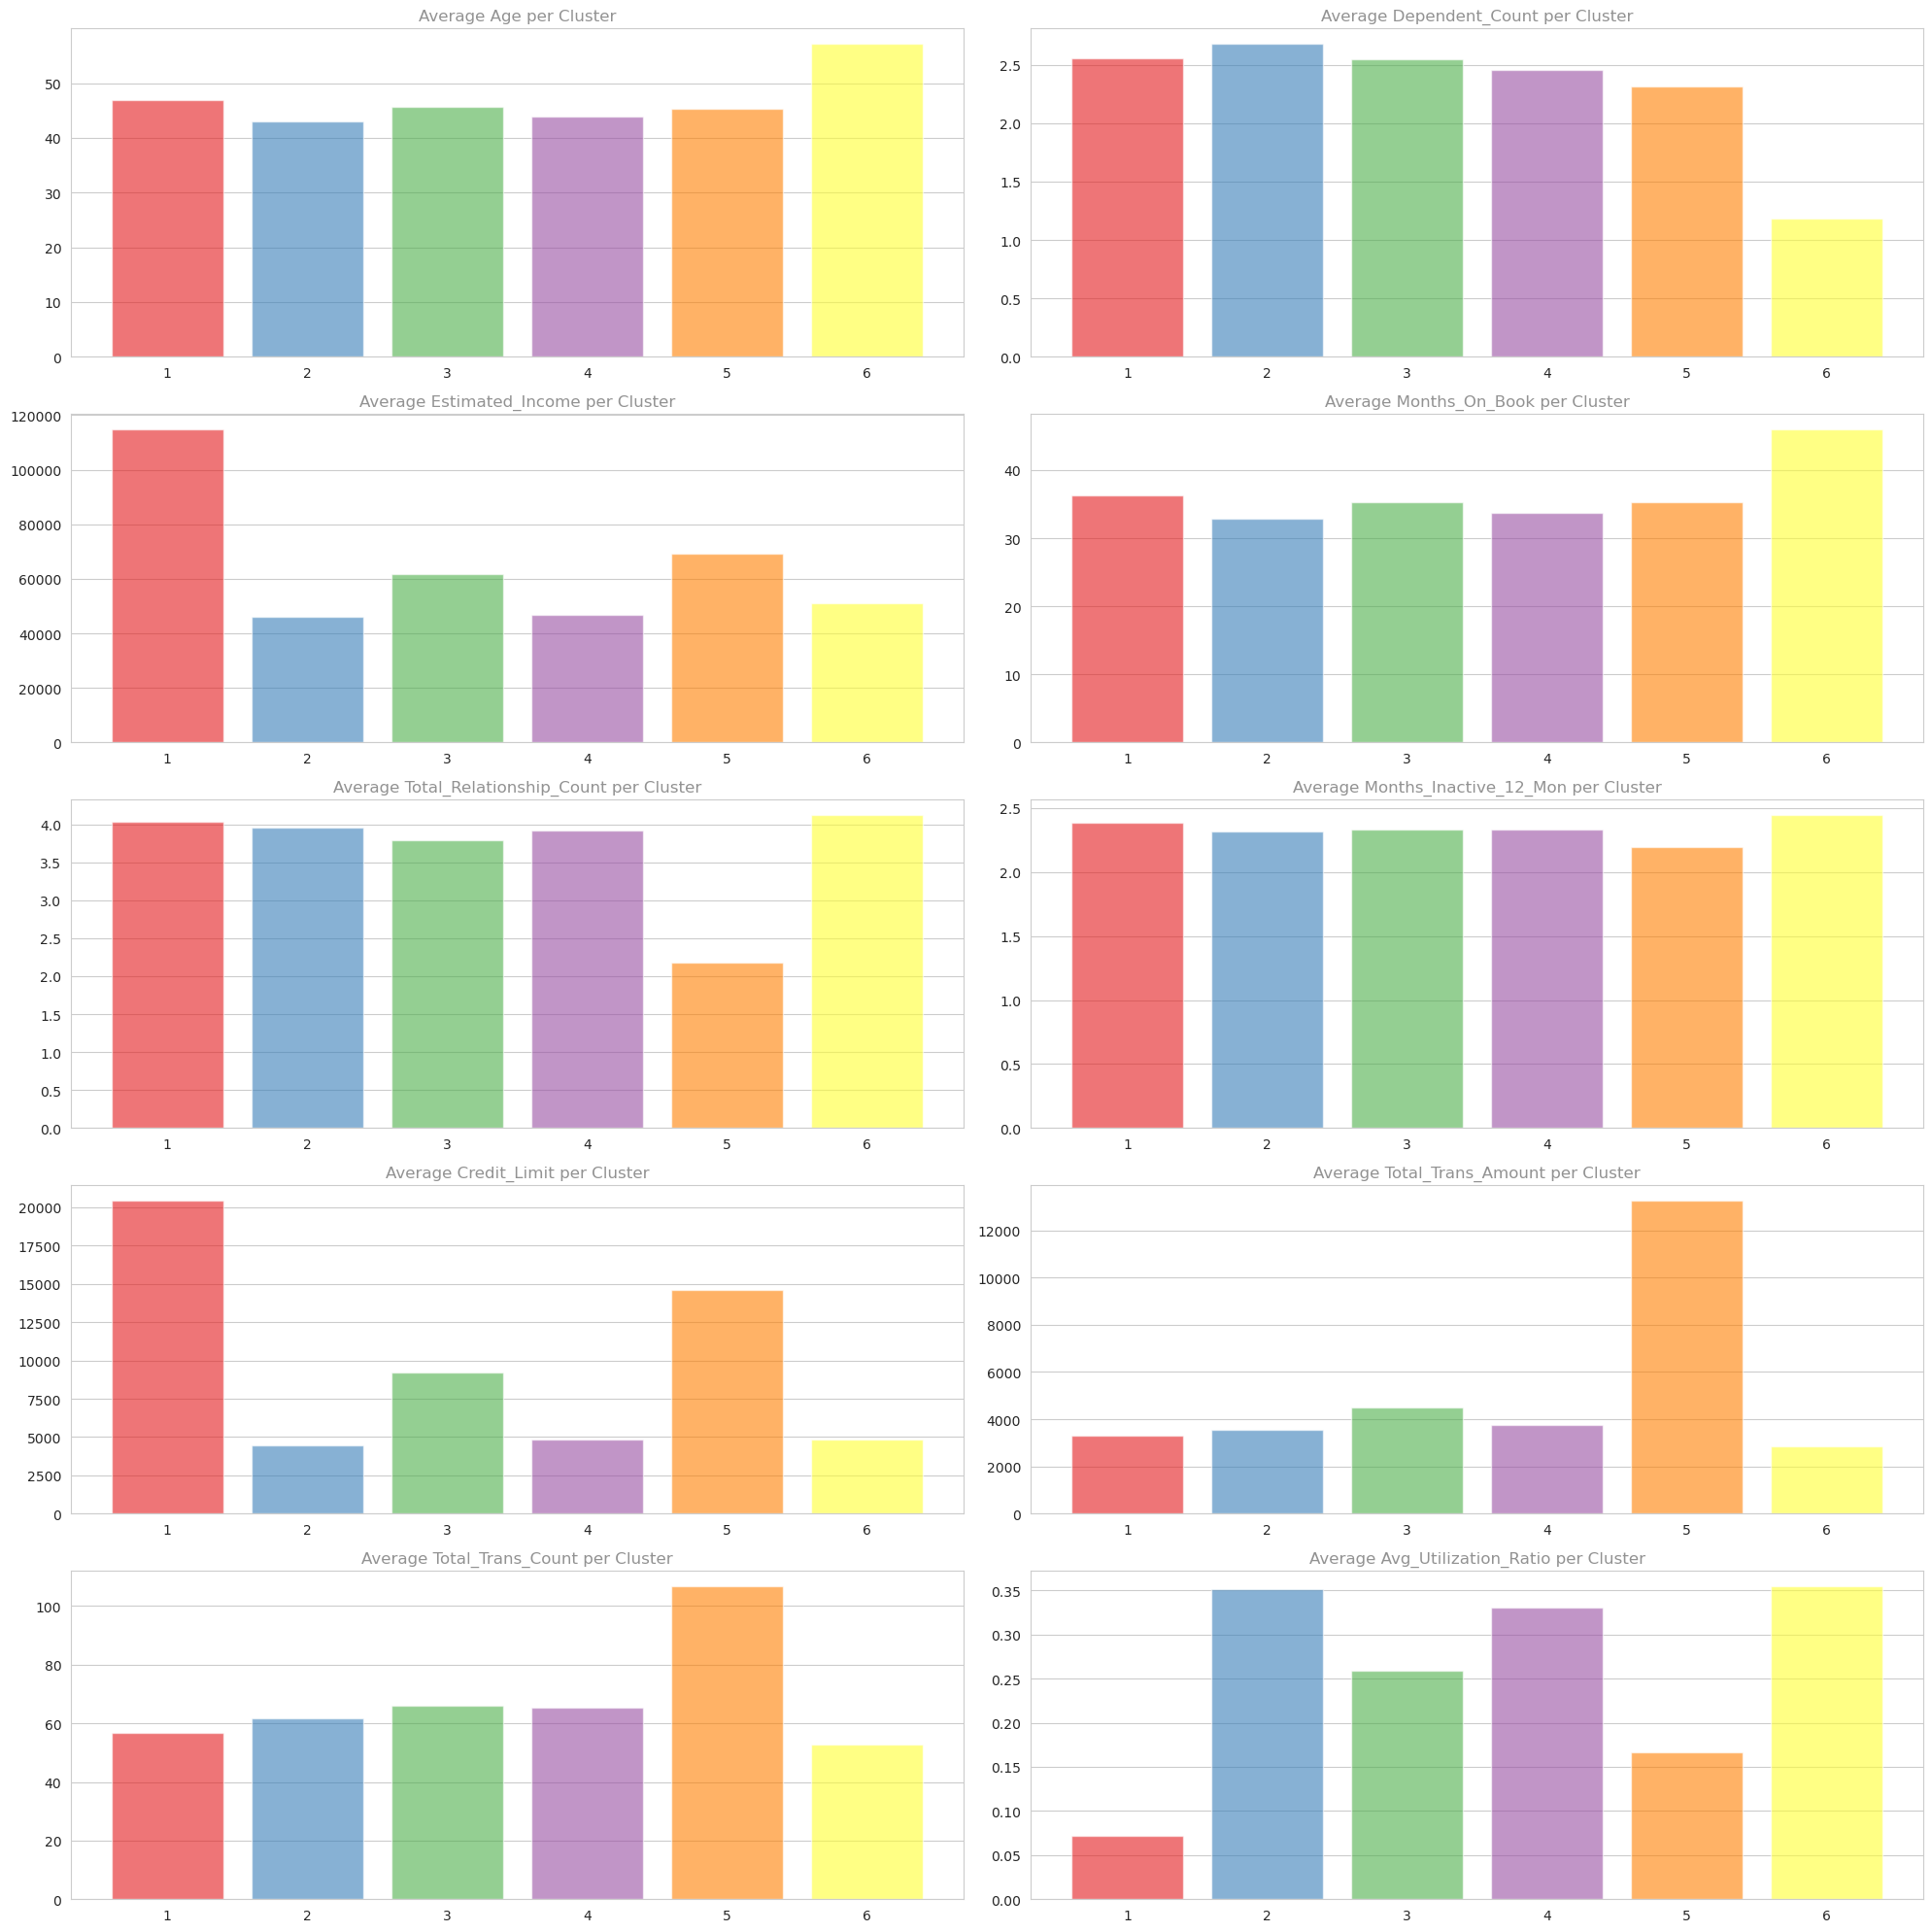

In [16]:
fig = plt.figure(figsize=(20, 20))

numeric_columns = customer.select_dtypes(include=np.number).drop(['customer_id', 'CLUSTER'], axis=1).columns

for i, column in enumerate(numeric_columns):
    df_plot = customer.groupby('CLUSTER')[column].mean()
    ax = fig.add_subplot(5, 2, i+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)
    
plt.tight_layout()
plt.show()


For those numerical variables with higher correlations we 
saw earlier, we can also use a scatter plot to visualize this correlation 
grouped by clusters and analyze how the clusters change between each area of the chart.


In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))
sns.scatterplot(x='age', y='months_on_book', hue='CLUSTER', data=customer, palette='tab10', alpha=0.4, ax=ax1)
sns.scatterplot(x='estimated_income', y='credit_limit', hue='CLUSTER', data=customer, palette='tab10', alpha=0.4, ax=ax2, legend=False)
sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', hue='CLUSTER', data=customer, palette='tab10', alpha=0.4, ax=ax3)
sns.scatterplot(x='total_trans_count', y='total_trans_amount', hue='CLUSTER', data=customer, palette='tab10', alpha=0.4, ax=ax4, legend=False)

plt.tight_layout()
plt.show()


We can draw some early conclusions considering only the numeric variables.

For instance, Cluster 1 has the highest amount of money transitioned, 
while Cluster 2 has the lowest credit limit and estimated income and 
the highest utilization rate. Cluster 4 has the highest credit limit. 
Older clients are grouped in Cluster 5.

For the categorical columns, we'll plot the percentual distribution of each variable 
in each cluster. This will allow us to verify if a particular cluster 
is mostly composed of men, or of married people only, for example.


/tmp/ipykernel_65/3953711983.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)
/tmp/ipykernel_65/3953711983.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)
/tmp/ipykernel_65/3953711983.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


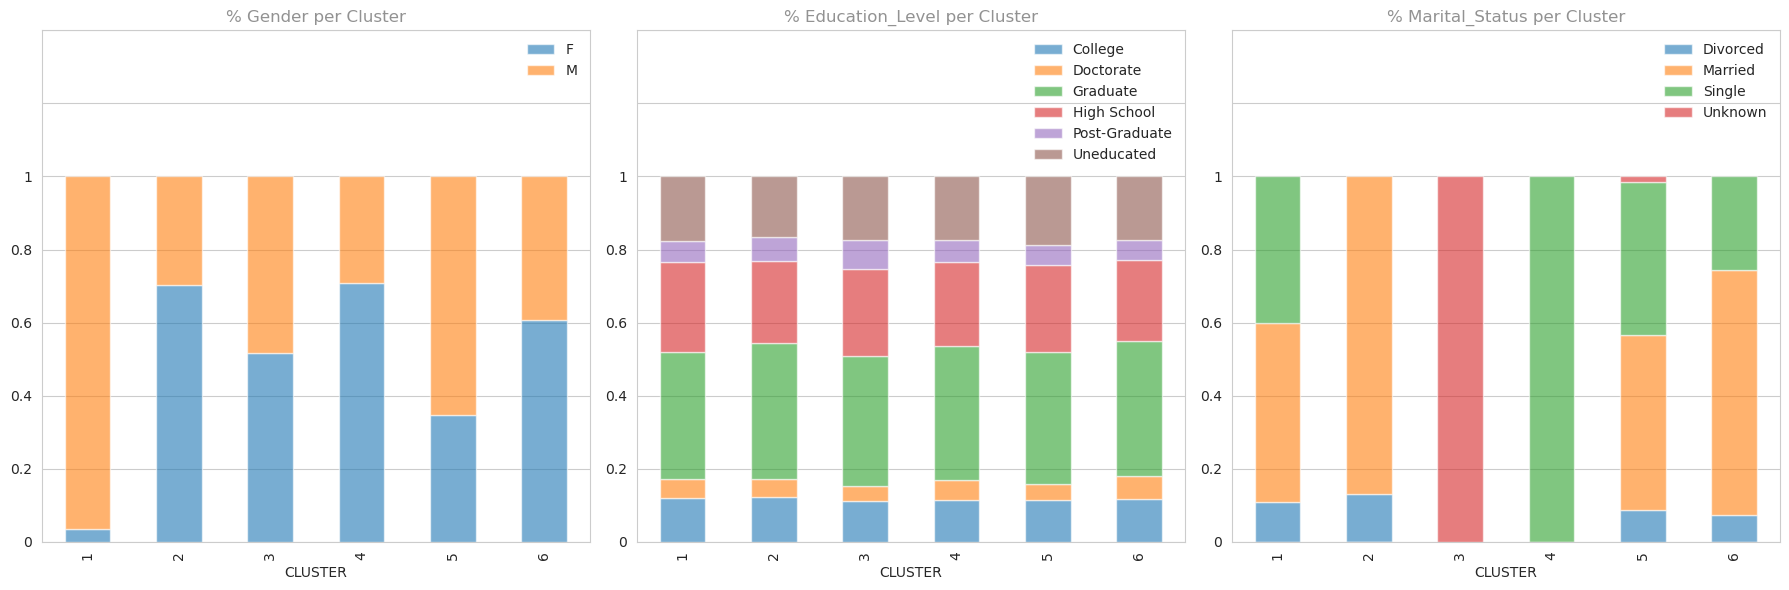

In [19]:
cat_columns = customer.select_dtypes(include=['object'])

fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(cat_columns):
    plot_df = pd.crosstab(index=customer['CLUSTER'], columns=customer[col], values=customer[col], aggfunc='size', normalize='index')
    ax = fig.add_subplot(1, 3, i+1)
    plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f'% {col.title()} per Cluster', alpha=0.5)

    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)
    
    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ax.set_yticklabels(labels)

plt.tight_layout()
plt.show()


Considering the categorical variables, we notice that the education level is well divided between clusters.


In other highlights, Cluster 2 is composed almost entirely of married people, while we don't know the marital status of anybody in Cluster 3.Cluster 4 is 100% made of single people

### Cluster 1
Characteristics: Mostly men; high credit limit; high amount transitioned; high number of transactions; low utilization rate.

Insight: People with high volume spent on the card, but do not use it on a daily basis. Could be incentivised to spend more.

### Cluster 2
Characteristics: Mostly women; mostly married; low estimated income; low credit limit; low amount transitioned; high utilization rate.

Insight: Married people (majority women) with low income and limit but utilize too much of their credit with a few larger purchases

### Cluster 3
Cluster 3: Gender well divided; low credit limit, high utilization rate; marital status 100% unknown; smaller cluster.

Insight: Men and women with low credit limits but do have high balances.

### Cluster 4
Cluster 4: Mostly men, mostly single and married, high estimated income, high credit limit; low amount transitioned; low utilization rate.

Insight: People (majority men) with high income and credit limits, but don't use the card. Could be incentivized to use it.

### Cluster 5
Cluster 5: Mostly married, high age, low dependent count, long time customers, low credit limit, low amount transitioned, high utilization rate.

Insight: Older people and long-time customers. Low credit limit and transactions, but use the card very often. Could receive benefits to spend more money.

### Cluster 6
Cluster 6: Mostly women; 100% single people, low estimated income, low credit limit, low amount transitioned, high utilization rate.

Insight: Single (mostly women) people that use their card a lot but have low credit limits and income. Could be given a bit more credit limit.